# Metobs without observational data

For some applications you do not have observational data (yet), but you still want to use the Metobs toolkit functionality on the metadata (the locations of the stations). In the toolkit, this is implemented as *"metadata-only"* `Datasets`. 

These `Dataset`s do not hold observational data, and thus no outliers and gaps, but only metadata. The process for creating a *"metadata-only"* `Datasets` is similar to creating a regular `Dataset`.

In [1]:
import metobs_toolkit

# start by making a template, and answer "N" when asked if you have an observational data file
#metobs_toolkit.build_template_prompt()

As an example, we use the demo metadata file and use it to create a "metadata-only" `Dataset` by applying the `Dataset.import_only_metadata_from_file()` method.

In [2]:
# Initiate an empty dataset
your_dataset = metobs_toolkit.Dataset()
# Update the paths to the metadata and template file
your_dataset.update_file_paths(
                    #The path to the metadata CSV file
                    input_metadata_file = metobs_toolkit.demo_metadatafile,
                    #The path to the template (JSON) that you created
                    template_file = metobs_toolkit.demo_template
    )

# Import the metadata into the Dataset
your_dataset.import_only_metadata_from_file()

print(your_dataset)

print(f"\n The observational records: {your_dataset.df}")

The following columns are found in the metadata, but not in the template and are therefore ignored: 
['benaming', 'Network', 'stad', 'sponsor']


Instance of a Dataset (metadata-only).
     *28 stations in the metadata
     *The following columns are present in the metadf: ['geometry', 'lat', 'lon', 'school']
     *Coordinates are available for all stations.
     *Known GEE datasets for: ['lcz', 'altitude', 'worldcover', 'ERA5-land']

 The observational records: Empty DataFrame
Columns: []
Index: []


We have thus a "metadata-only" Dataset, without observations. We can still extract metadata from GEE etc.

## Extract Static GEE data
As an example, we can extract landcoverfractions at the locations of the stations by using the `Dataset.get_landcover()` method. 

In [3]:
landcov_fractions = your_dataset.get_landcover(
                            buffers=[50, 250], #fractions at 50m and 250m circular buffers
                            aggregate=False,
                            gee_map='worldcover')
landcov_fractions.head(10)

Grassland  Cropland  Tree cover  Built-up  \
name      buffer_radius                                              
vlinder01 50              0.545691  0.454309    0.000000  0.000000   
          250             0.318707  0.640718    0.004210  0.036365   
vlinder02 50              0.629257  0.000000    0.014283  0.356460   
          250             0.079028  0.000000    0.456916  0.464056   
vlinder03 50              0.000000  0.000000    0.488206  0.511794   
          250             0.039230  0.000000    0.121601  0.839169   
vlinder04 50              1.000000  0.000000    0.000000  0.000000   
          250             0.639318  0.154280    0.088349  0.118052   
vlinder05 50              0.114271  0.000000    0.000000  0.053965   
          250             0.161088  0.000000    0.365889  0.230617   

                         Permanent water bodies  Herbaceous wetland  \
name      buffer_radius                                               
vlinder01 50                           0.000000                 0.0   
          250                          0.000000                 0.0   
vlinder02 50                           0.000000                 0.0   
          250                          0.000000                 0.0   
vlinder03 50                           0.000000                 0.0   
          250                          0.000000                 0.0   
vlinder04 50                           0.000000                 0.0   
          250                          0.000000                 0.0   
vlinder05 50                           0.831764                 0.0   
          250                          0.242406                 0.0   

                         Bare / sparse vegetation  
name      buffer_radius                            
vlinder01 50                                  0.0  
          250                                 0.0  
vlinder02 50                                  0.0  
          250                                 0.0  
vlinder03 50                                  0.0  
          250                                 0.0  
vlinder04 50                                  0.0  
          250                                 0.0  
vlinder05 50                                  0.0  
          250                                 0.0

## Extract timeseries from GEE

We can also extract timeseries from a `GeeDynamicModeldata` object, like the default `ERA5-land`. As an example, we extract temperature timeseries.

In [4]:
import pandas as pd
start = pd.Timestamp('2017-01-01T12')
end = pd.Timestamp('2017-01-02T16')

era5 = your_dataset.get_modeldata(
                Model=your_dataset.gee_datasets['ERA5-land'],
                obstypes=['temp'],
                startdt=start,
                enddt=end)  

colormap: tab20, is not well suited to color 28 categories.


<Axes: title={'center': 'ERA5-land'}, ylabel='temp (Celsius)\n originates from temperature_2m'>

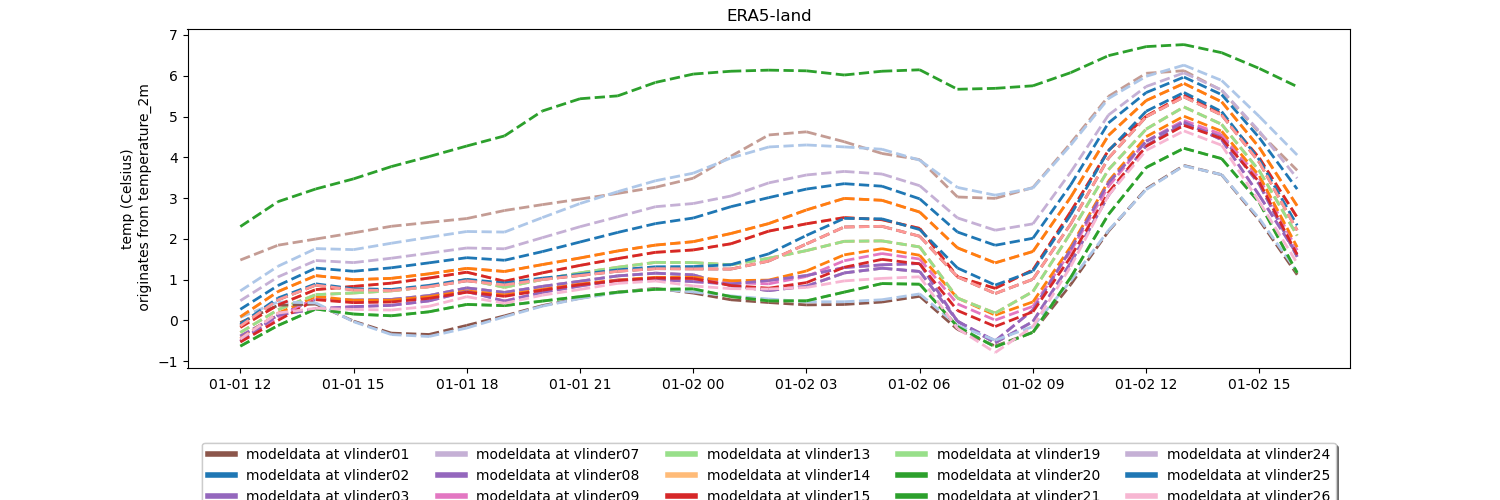

In [5]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None} #else the legend is cutoff in ipython inline plots
era5.make_plot()